<a href="https://colab.research.google.com/github/THARUNIKA28/heart-disease/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Dataset Preview:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0



📌 Missing Values in Dataset:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

✅ Random Forest Model Performance:
🔹 Training Accuracy: 0.98
🔹 Testing Accuracy: 0.92

📊 Classification Report (Random Forest - Test Data):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        94
           1       0.92      0.95      0.93       117

    accuracy                           0.92       211
   macro avg       0.93      0.92      0.92       211
weighted avg       0.92      0.92      0.92       211


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


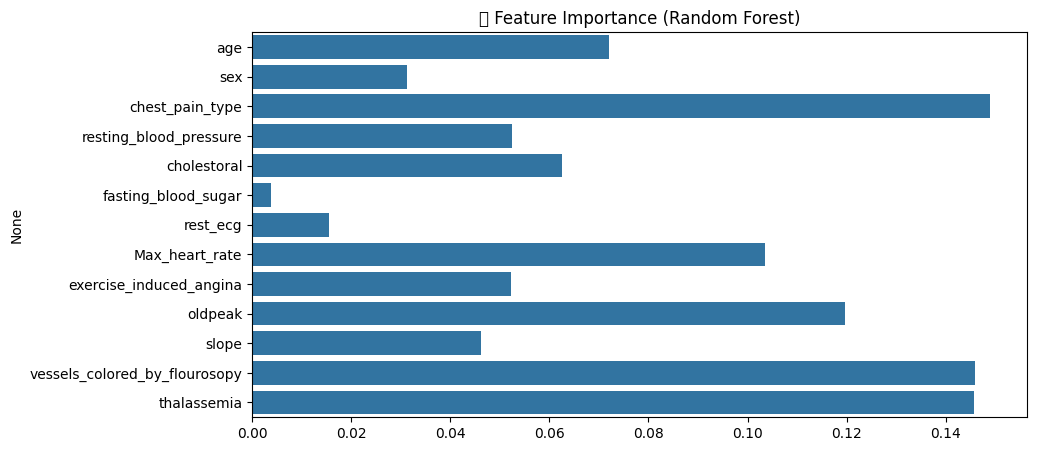


🔵 Enter Patient Details Below:


IntText(value=50, description='Age:')

Dropdown(description='Sex:', options=('Female', 'Male'), value='Female')

Dropdown(description='Chest Pain:', options=('Asymptomatic', 'Atypical angina', 'Non-anginal pain', 'Typical a…

IntText(value=120, description='Rest BP:')

IntText(value=200, description='Cholesterol:')

Dropdown(description='Fasting Sugar:', options=('Greater than 120 mg/ml', 'Lower than 120 mg/ml'), value='Grea…

Dropdown(description='Rest ECG:', options=('Left ventricular hypertrophy', 'Normal', 'ST-T wave abnormality'),…

IntText(value=150, description='Max Heart Rate:')

Dropdown(description='Exercise Angina:', options=('No', 'Yes'), value='No')

FloatText(value=1.0, description='Oldpeak:')

Dropdown(description='Slope:', options=('Downsloping', 'Flat', 'Upsloping'), value='Downsloping')

Dropdown(description='Vessels Fluoro:', options=('Four', 'One', 'Three', 'Two', 'Zero'), value='Four')

Dropdown(description='Thalassemia:', options=('Fixed Defect', 'No', 'Normal', 'Reversable Defect'), value='Fix…

Button(description='Check Heart Disease', style=ButtonStyle())


🔴 Heart Disease Detected!


In [1]:
# Install necessary libraries
!pip install imbalanced-learn xgboost

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import ipywidgets as widgets
from IPython.display import display
from xgboost import XGBClassifier

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HeartDiseaseTrain-Test.csv')

# Display first 5 rows
print("📌 Dataset Preview:")
display(df.head())

# Check for missing values
print("\n📌 Missing Values in Dataset:")
print(df.isnull().sum())

# Encode Categorical Variables
label_encoders = {}
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert text to numbers
    label_encoders[col] = le  # Store encoder for future decoding if needed

# Split Features & Target Variable
X = df.drop(columns=['target'])
y = df['target']

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimized Random Forest Model (Fixing Overfitting)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,  # Reduce tree depth
    min_samples_split=10,  # Prevent too many splits
    min_samples_leaf=5,  # Ensure minimum samples in leaves
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Optimized XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,  # Reduce depth for better generalization
    learning_rate=0.05,  # Reduce learning rate
    reg_lambda=10,  # L2 Regularization
    reg_alpha=5,  # L1 Regularization
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Model Evaluation with Classification Report
rf_y_train_pred = rf_model.predict(X_train_scaled)
rf_y_test_pred = rf_model.predict(X_test_scaled)

rf_train_acc = accuracy_score(y_train, rf_y_train_pred)
rf_test_acc = accuracy_score(y_test, rf_y_test_pred)

print(f"\n✅ Random Forest Model Performance:")
print(f"🔹 Training Accuracy: {rf_train_acc:.2f}")
print(f"🔹 Testing Accuracy: {rf_test_acc:.2f}")

print("\n📊 Classification Report (Random Forest - Test Data):")
print(classification_report(y_test, rf_y_test_pred))

# Perform Cross-Validation for Generalization Check
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)

print(f"\n📌 Cross-validation accuracy (Random Forest): {np.mean(cv_scores_rf):.2f}")
print(f"📌 Cross-validation accuracy (XGBoost): {np.mean(cv_scores_xgb):.2f}")

# Evaluate XGBoost Model
xgb_y_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_acc = accuracy_score(y_test, xgb_y_test_pred)
print(f"\n✅ XGBoost Model Accuracy: {xgb_test_acc:.2f}")

# Show Feature Importance (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title("📌 Feature Importance (Random Forest)")
plt.show()

# User Input Interface
print("\n🔵 Enter Patient Details Below:")

# Create Input Widgets
age = widgets.IntText(description="Age:", value=50)
sex = widgets.Dropdown(description="Sex:", options=label_encoders['sex'].classes_)
cp = widgets.Dropdown(description="Chest Pain:", options=label_encoders['chest_pain_type'].classes_)
rbp = widgets.IntText(description="Rest BP:", value=120)
chol = widgets.IntText(description="Cholesterol:", value=200)
fbs = widgets.Dropdown(description="Fasting Sugar:", options=label_encoders['fasting_blood_sugar'].classes_)
restecg = widgets.Dropdown(description="Rest ECG:", options=label_encoders['rest_ecg'].classes_)
mhr = widgets.IntText(description="Max Heart Rate:", value=150)
exang = widgets.Dropdown(description="Exercise Angina:", options=label_encoders['exercise_induced_angina'].classes_)
oldpeak = widgets.FloatText(description="Oldpeak:", value=1.0)
slope = widgets.Dropdown(description="Slope:", options=label_encoders['slope'].classes_)
vessels = widgets.Dropdown(description="Vessels Fluoro:", options=label_encoders['vessels_colored_by_flourosopy'].classes_)
thal = widgets.Dropdown(description="Thalassemia:", options=label_encoders['thalassemia'].classes_)

# Predict Function
def predict_heart_disease(b):
    # Collect user input
    user_data = pd.DataFrame({
        'age': [age.value],
        'sex': [label_encoders['sex'].transform([sex.value])[0]],
        'chest_pain_type': [label_encoders['chest_pain_type'].transform([cp.value])[0]],
        'resting_blood_pressure': [rbp.value],
        'cholestoral': [chol.value],
        'fasting_blood_sugar': [label_encoders['fasting_blood_sugar'].transform([fbs.value])[0]],
        'rest_ecg': [label_encoders['rest_ecg'].transform([restecg.value])[0]],
        'Max_heart_rate': [mhr.value],
        'exercise_induced_angina': [label_encoders['exercise_induced_angina'].transform([exang.value])[0]],
        'oldpeak': [oldpeak.value],
        'slope': [label_encoders['slope'].transform([slope.value])[0]],
        'vessels_colored_by_flourosopy': [label_encoders['vessels_colored_by_flourosopy'].transform([vessels.value])[0]],
        'thalassemia': [label_encoders['thalassemia'].transform([thal.value])[0]]
    })

    # Scale input data
    user_data_scaled = scaler.transform(user_data)

    # Make Prediction using Random Forest
    prediction = rf_model.predict(user_data_scaled)[0]
    result = "🔴 Heart Disease Detected!" if prediction == 1 else "🟢 No Heart Disease."
    print("\n" + result)

# Button to Predict
predict_button = widgets.Button(description="Check Heart Disease")
predict_button.on_click(predict_heart_disease)

# Display UI
display(age, sex, cp, rbp, chol, fbs, restecg, mhr, exang, oldpeak, slope, vessels, thal, predict_button)
